## Loading Images and Manipulating them for training using keras ImageDataGenerator

#### Downloading Images

In [1]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week2.zip

--2020-07-28 03:38:38--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week2.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 260502910 (248M) [application/zip]
Saving to: ‘concrete_data_week2.zip’

100%[======================================>] 260,502,910 35.7MB/s   in 7.1s   

2020-07-28 03:38:46 (35.2 MB/s) - ‘concrete_data_week2.zip’ saved [260502910/260502910]



In [2]:
!unzip concrete_data_week2.zip

Archive:  concrete_data_week2.zip
   creating: concrete_data_week2/
   creating: concrete_data_week2/Positive/
  inflating: concrete_data_week2/Positive/16679_1.jpg  
   creating: __MACOSX/
   creating: __MACOSX/concrete_data_week2/
   creating: __MACOSX/concrete_data_week2/Positive/
  inflating: __MACOSX/concrete_data_week2/Positive/._16679_1.jpg  
  inflating: concrete_data_week2/Positive/04354.jpg  
  inflating: __MACOSX/concrete_data_week2/Positive/._04354.jpg  
  inflating: concrete_data_week2/Positive/02725.jpg  
  inflating: __MACOSX/concrete_data_week2/Positive/._02725.jpg  
  inflating: concrete_data_week2/Positive/11369_1.jpg  
  inflating: __MACOSX/concrete_data_week2/Positive/._11369_1.jpg  
  inflating: concrete_data_week2/Positive/19463.jpg  
  inflating: __MACOSX/concrete_data_week2/Positive/._19463.jpg  
  inflating: concrete_data_week2/Positive/07885.jpg  
  inflating: __MACOSX/concrete_data_week2/Positive/._07885.jpg  
  inflating: concrete_data_week2/Positive/09670.j

#### Importing Libraries and Packages

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


##### To check the content of data folder

In [4]:
!ls ./concrete_data_week2

Negative  Positive


In [5]:
os.listdir('concrete_data_week2')

['.DS_Store', 'Negative', 'Positive']

In [6]:
dataset_dir = './concrete_data_week2'

### Define Keras ImageDataGenerator instance and using it to manipulate data for building deep learning models

Keras ImageDataGenerator Requires images to be arranged in a certain folder hierarchy, where the main directory would contain folders equals to the number of classes in the problem. Since in this case we are trying to build a classifier of two classes, then our main directory should contain two folders, one for each class. 

#### Standard ImageDataGenerator

In [7]:
data_generator = ImageDataGenerator()

In [8]:
image_generator = data_generator.flow_from_directory(
    dataset_dir,
    batch_size = 4,
    class_mode ='categorical',
    seed = 24
)

Found 40000 images belonging to 2 classes.


In [9]:
## To access the batch Image & Labels
first_batch = image_generator.next()
first_batch

(array([[[[151., 149., 150.],
          [153., 151., 152.],
          [155., 153., 154.],
          ...,
          [153., 149., 148.],
          [153., 149., 148.],
          [153., 149., 148.]],
 
         [[152., 150., 151.],
          [154., 152., 153.],
          [156., 154., 155.],
          ...,
          [154., 150., 149.],
          [154., 150., 149.],
          [154., 150., 149.]],
 
         [[153., 151., 152.],
          [155., 153., 154.],
          [156., 154., 155.],
          ...,
          [156., 152., 151.],
          [156., 152., 151.],
          [156., 152., 151.]],
 
         ...,
 
         [[142., 140., 143.],
          [142., 140., 143.],
          [142., 140., 143.],
          ...,
          [139., 135., 136.],
          [142., 138., 139.],
          [145., 141., 142.]],
 
         [[142., 140., 143.],
          [142., 140., 143.],
          [142., 140., 143.],
          ...,
          [140., 136., 137.],
          [142., 138., 139.],
          [146., 142., 143.

In [10]:
### To get Only Images
first_batch_images = image_generator.next()[0]
first_batch_images

array([[[[172., 174., 169.],
         [176., 178., 173.],
         [181., 183., 178.],
         ...,
         [157., 159., 154.],
         [156., 158., 153.],
         [154., 156., 151.]],

        [[170., 172., 167.],
         [172., 174., 169.],
         [174., 176., 171.],
         ...,
         [155., 157., 152.],
         [154., 156., 151.],
         [153., 155., 150.]],

        [[169., 171., 166.],
         [167., 169., 164.],
         [166., 168., 163.],
         ...,
         [152., 154., 149.],
         [152., 154., 149.],
         [151., 153., 148.]],

        ...,

        [[153., 154., 148.],
         [155., 156., 150.],
         [158., 159., 153.],
         ...,
         [143., 144., 138.],
         [144., 145., 139.],
         [145., 146., 140.]],

        [[147., 148., 142.],
         [150., 151., 145.],
         [153., 154., 148.],
         ...,
         [142., 143., 137.],
         [143., 144., 138.],
         [144., 145., 139.]],

        [[141., 142., 136.],
       

In [11]:
### TO GET THE LABELS ONLY
first_batch_labels = image_generator.next()[1]
first_batch_labels

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

#### Custom ImageDataGenerator

In [12]:
data_generator = ImageDataGenerator(
    rescale=1./255
)

In [13]:
image_generator = data_generator.flow_from_directory(
    dataset_dir,
    batch_size = 4,
    class_mode = 'categorical',
    seed = 24
)

Found 40000 images belonging to 2 classes.


In [14]:
first_batch = image_generator.next()
first_batch

(array([[[[0.5921569 , 0.58431375, 0.5882353 ],
          [0.6       , 0.5921569 , 0.59607846],
          [0.60784316, 0.6       , 0.6039216 ],
          ...,
          [0.6       , 0.58431375, 0.5803922 ],
          [0.6       , 0.58431375, 0.5803922 ],
          [0.6       , 0.58431375, 0.5803922 ]],
 
         [[0.59607846, 0.5882353 , 0.5921569 ],
          [0.6039216 , 0.59607846, 0.6       ],
          [0.6117647 , 0.6039216 , 0.60784316],
          ...,
          [0.6039216 , 0.5882353 , 0.58431375],
          [0.6039216 , 0.5882353 , 0.58431375],
          [0.6039216 , 0.5882353 , 0.58431375]],
 
         [[0.6       , 0.5921569 , 0.59607846],
          [0.60784316, 0.6       , 0.6039216 ],
          [0.6117647 , 0.6039216 , 0.60784316],
          ...,
          [0.6117647 , 0.59607846, 0.5921569 ],
          [0.6117647 , 0.59607846, 0.5921569 ],
          [0.6117647 , 0.59607846, 0.5921569 ]],
 
         ...,
 
         [[0.5568628 , 0.54901963, 0.56078434],
          [0.55686

### Visualize Batches Of Images

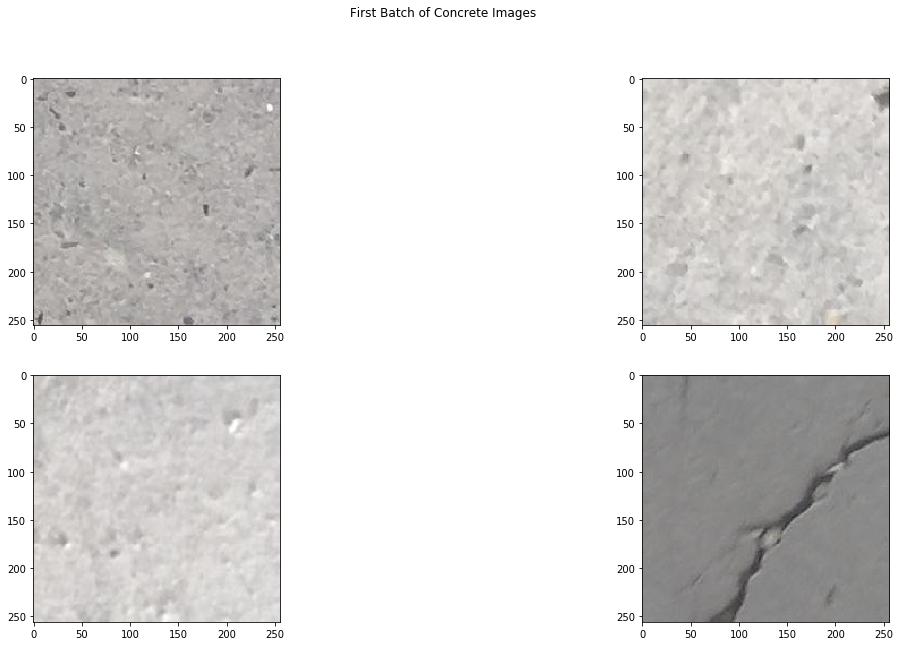

In [21]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10))

ind = 0 
for ax1 in axs:
    for ax2 in ax1:
        image_data = first_batch_images[ind]
        ax2.imshow(image_data)
        ind += 1
        
fig.suptitle("First Batch of Concrete Images")
plt.show()

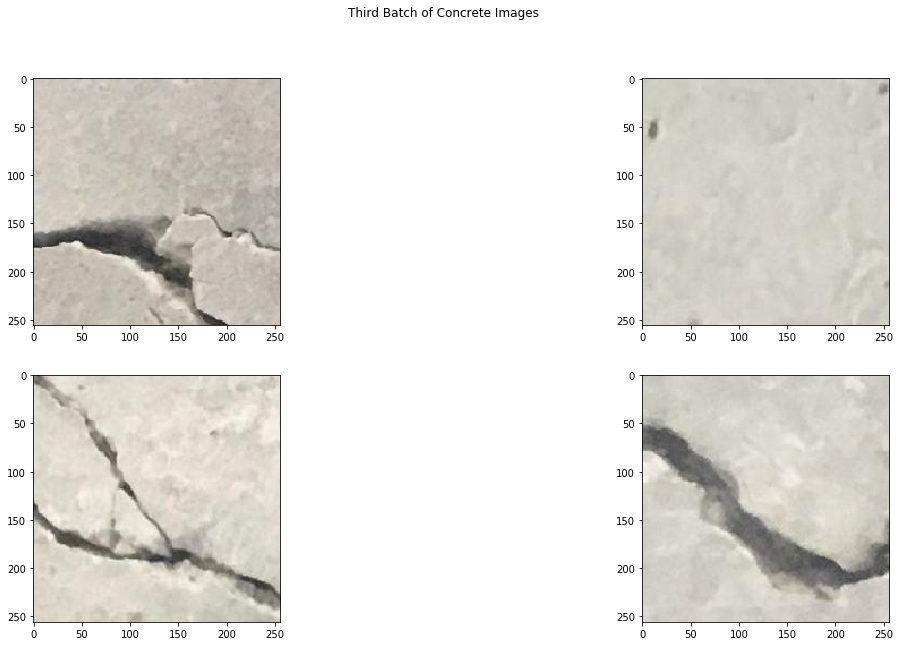

In [32]:
first_batch_images = image_generator.next()[0]
second_batch_images = image_generator.next()[0]
third_batch_images = image_generator.next()[0]
fourth_batch= image_generator.next()
fifth_batch = image_generator.next()

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10))

ind = 0 
for ax1 in axs:
    for ax2 in ax1:
        image_data = third_batch_images[ind]
        ax2.imshow(image_data)
        ind += 1
        
fig.suptitle("Third Batch of Concrete Images")
plt.show()

In [33]:
fourth_batch_labels = fourth_batch[1]

fourth_batch_labels

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [34]:
fifth_batch[1]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)